# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [2]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


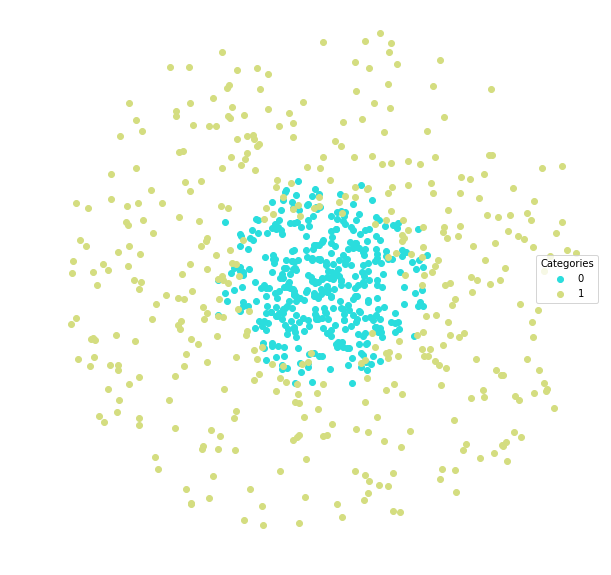

In [3]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [4]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [5]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [6]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.52,0.5,0.00,0.52,0.0
1,0.52,0.5,0.48,0.48,1.0


This lets us look at which classes do better:

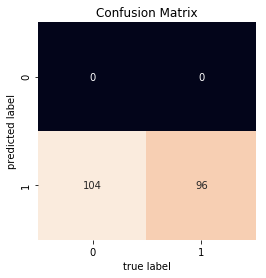

In [7]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

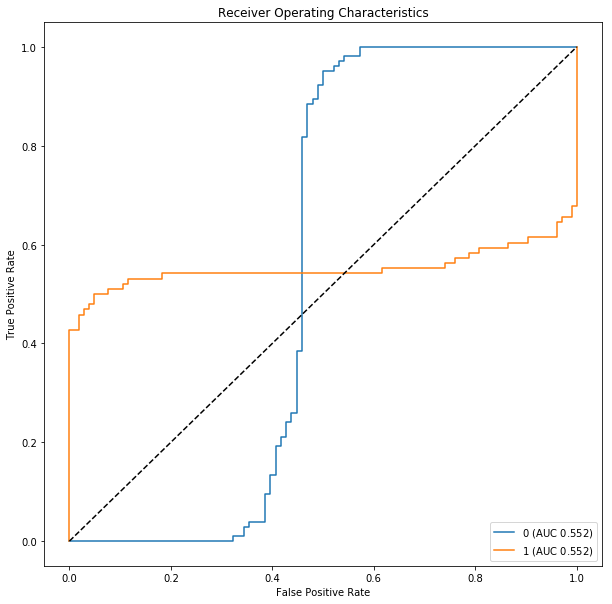

In [8]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


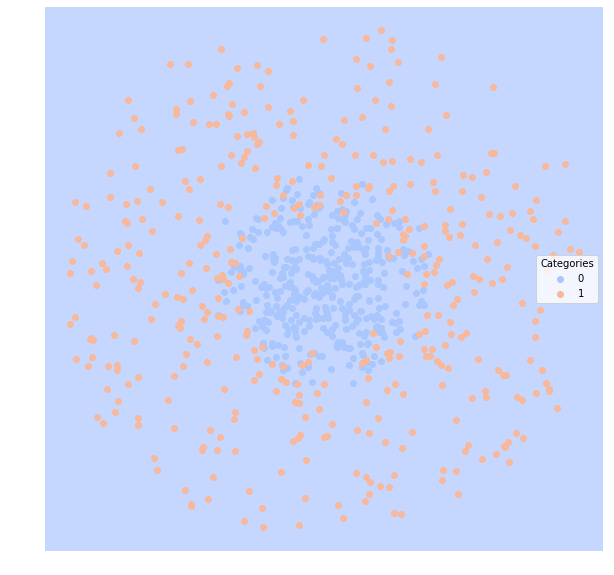

In [10]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [11]:
dfTrain_1, dfTest_1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


In [12]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

In [13]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [14]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.12,0.879407,0.877358,0.839561,0.894231
1,0.12,0.879407,0.882979,0.828409,0.864583


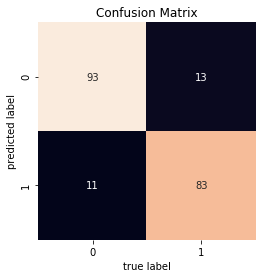

In [15]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

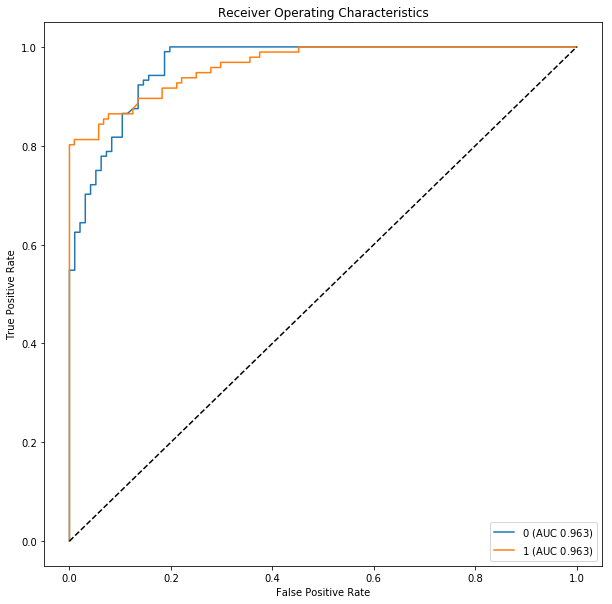

In [16]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


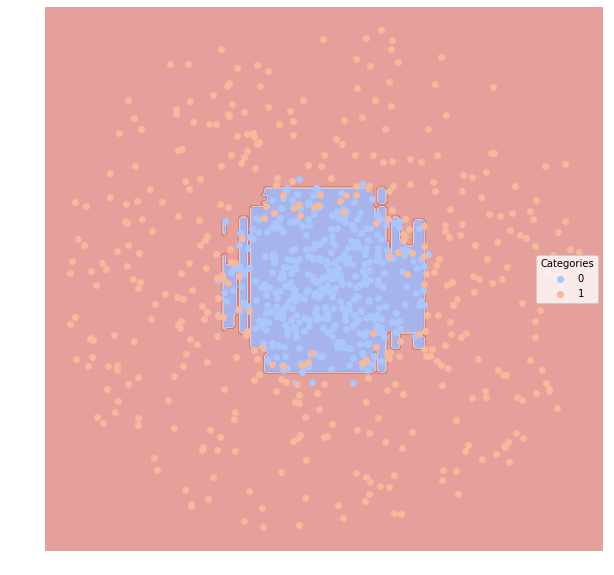

In [17]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

For both the artificial and real datasets, I classify them with all the methods mentioned above. For evaluation, I simply use the average error rate of all classes as the metric, which means a smaller value is better. However, in real problems, we might choose other metrics like ROC-AUC, precision or recall rate of our interested classes to evaluate.  

In [167]:
# generate 10 distinct datasets, 2 for each of the 5 types
noise = 0.2
arti_dfs=[]
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.random()))
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.random()))
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise)))
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise)))
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)))#Please try this one
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)))#Please try this one
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise)))
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise)))
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise)))
arti_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise)))

# All the classifiers 
classifiers = {'NaiveBayes':sklearn.naive_bayes.GaussianNB(),
               'SVM1':sklearn.svm.SVC(kernel = 'linear', probability = True),
               'SVM2':sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),
               'KNN5':sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
               'LogisticRegression':sklearn.linear_model.LogisticRegression(),
               'DecisionTree':sklearn.tree.DecisionTreeClassifier(),
               'RandomForest':sklearn.ensemble.RandomForestClassifier(),
               'MLP':sklearn.neural_network.MLPClassifier(),
               'Ensemble':sklearn.ensemble.GradientBoostingClassifier(),
               'AdaBoost':sklearn.ensemble.AdaBoostClassifier(sklearn.tree.DecisionTreeClassifier(max_depth = 4))}

In [168]:
# present the result of classification of artificial datasets
arti_result = pd.DataFrame(columns=classifiers.keys())
for i in range(10):
    for k in classifiers.keys():
        clf = classifiers[k]
        train, test = arti_dfs[i]
        clf.fit(np.stack(train['vect'], axis=0), train['category'])
        evaluation_df = lucem_illud_2020.evaluateClassifier(clf, test)
        ave_error = evaluation_df['Error_Rate'].mean()
        arti_result.loc[i,k] = ave_error
arti_result

F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetr

,NaiveBayes,SVM1,SVM2,KNN5,LogisticRegression,DecisionTree,RandomForest,MLP,Ensemble,AdaBoost
0,0.57,0.555,0.545,0.53,0.58,0.515,0.54,0.515,0.515,0.515
1,0.53,0.465,0.505,0.505,0.535,0.465,0.455,0.5,0.47,0.445
2,0.165,0.155,0.205,0.155,0.165,0.16,0.135,0.155,0.145,0.145
3,0.085,0.075,0.08,0.095,0.08,0.09,0.09,0.08,0.09,0.09
4,0.465,0.37,0.235,0.09,0.465,0.125,0.105,0.07,0.085,0.09
5,0.445,0.335,0.28,0.1,0.43,0.12,0.13,0.115,0.115,0.115
6,0.105,0.55,0.55,0.115,0.57,0.075,0.09,0.1,0.075,0.105
7,0.1,0.355,0.525,0.135,0.4,0.135,0.13,0.095,0.14,0.13
8,0.0224,0.0232,0.024,0.028,0.0352,0.0328,0.024,0.024,0.0264,0.0256
9,0,0,0,0,0,0.0016,0.0016,0,0.0016,0.0016


From the result, we can see the average error rate of each classifier per dataset. Before comparing these results, we see from the warnings that the MLP (neural_network) method sometimes has some issues of convergence, but I think that means the classifier has not reached the best situation but still, we might still gain some insights into its current performance. More iterations might only improve the accuracy a little bit. Then we would analyze the average error rates in the data frame.

For the random data pattern (dataset 0,1), none of the classifiers seem to show a desirable performance since their average error rates are nearly all over 50%. Among these poor results, the AdaBoost method performs the best. For the *andsplit* pattern (dataset 2,3), the random forest and SVM1 method yields the best result in the two datasets, respectively. For the *xorsplit* pattern (dataset 4,5), the MLP method becomes the best since it receives an overall lowest average error rates in the datasets, and KNN also happens to perform well for these two dataset. For the *targetsplit* pattern (dataset 6,7), it's interesting to see that the SVM methods seem to be ineffective while other classifiers like Naive Bayes and MLP shows good performance. For the *multiblobs* pattern (dataset 8,9), since the data points are distributed in clusters, the average error rate is much lower for all the classifiers, and single classifers like Naive Bayes and SVM classifier outweigh those ensemble models. 

In [170]:
real_dfs = []
real_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit()))
real_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups()))
real_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall()))
real_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge()))
real_dfs.append(lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam()))

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [171]:
# present the result of classification of real datasets
real_result = pd.DataFrame(columns=classifiers.keys())
for i in range(len(real_dfs)):
    for k in classifiers.keys():
        clf = classifiers[k]
        train, test = real_dfs[i]
        clf.fit(np.stack(train['vect'], axis=0), train['category'])
        evaluation_df = lucem_illud_2020.evaluateClassifier(clf, test)
        ave_error = evaluation_df['Error_Rate'].mean()
        real_result.loc[i,k] = ave_error
real_result

F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being se

,NaiveBayes,SVM1,SVM2,KNN5,LogisticRegression,DecisionTree,RandomForest,MLP,Ensemble,AdaBoost
0,0.136364,0.00626959,0.388715,0.0485893,0.00940439,0.0564263,0.0517241,0.0125392,0.015674,0.0344828
1,0.12234,0.0638298,0.375532,0.338298,0.0585106,0.12766,0.111702,0.056383,0.0968085,0.137234
2,0.16129,0.0146628,0.392962,0.131965,0.0234604,0.0058651,0.0058651,0.0527859,0.0058651,0.0117302
3,0.118974,0.00717949,0.228205,0.085641,0.0169231,0.00153846,0.00307692,0.0189744,0,0
4,0.168129,0.0935673,0.138889,0.0935673,0.109649,0.0994152,0.0906433,0.121345,0.111111,0.0877193


Among these five real datasets, the SVM2 claasifier always seems to get a poor functionality. However, its counterpart SVM1 shows much better performances and even serve as the best classifier for the Reddit dataset, which tells us that even the same types of classifiers with different kernals could have very unsimilar prediction ability. For the newsgroup dataset, MLP serve as the best with the lowest average error rate; For the Senate Small dataset, two Tree-based methods and the ensemble model outweigh the others; For the Senate Large dataset, it shows that the ensemble models stands out among other classifiers. 

Gnerally speaking, from both the artificial and real data, ensemble models like random forest, AdaBoost and also neural network models (MLP) performs better when the data have much noise while those single models like SVM, Naive Bayes and KNN can be more effective when the data are highly biased (classes differs a lot in their feature space), because in this case, I think those complicated models are likely overfit the data.

Also, I would like to mention the model AdaBoost, especially. This is the new classifier I applied to the above datasets, and it is an ensemble classifier. It begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. The base classifier I fit into is a 4-layer decision tree, so when comparing its performance to the single decision tree classifier, it would always have an better or at least equal performance (unless overfitting). Since it combines the advantages of several decision tree models, it would become powerful for those unbiased dataset. Meanwhile, this might also cause overfitting issues when the features of items are highly biased.  

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [2]:
ObamaClintonReleases = pd.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [3]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [19]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [4]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [5]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [6]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [7]:
TFVects.shape

(1368, 11210)

We can save this in the dataframe to make things easier

In [8]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [9]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [10]:
train_data_df['pca'] = [r for r in reduced_data]
train_data_df['pca']

716     [-0.010048173199975568, -0.02904599156921919, ...
1025    [0.0006948791841047283, -0.001768765535547846,...
394     [-0.017841302037488207, -0.009397963741462647,...
662     [0.5180442980935142, 0.07323961457142854, 0.16...
211     [0.041539250141158626, -0.008367032080172134, ...
984     [0.07320725190847106, 0.041520314057304074, -0...
539     [-0.0017492735550663882, -0.02507727340390254,...
82      [-0.010045211180261348, -0.010275067523868876,...
556     [-0.007628323531129211, -0.013710286456110745,...
822     [-0.03902085996235639, 0.016786735631786915, 0...
464     [-0.03003334539357566, -0.026598478015231238, ...
612     [-0.020603965602247774, 0.026473643050883677, ...
889     [-0.03173269315576402, -0.005008881378047722, ...
642     [-0.007132644304276658, -0.017258214934514505,...
1030    [-0.0023544406553794293, -0.013984705201460175...
324     [-0.010822049195531357, -0.04280952312444645, ...
197     [-0.0013092888701126293, -0.0647455797780903, ...
926     [-0.01

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


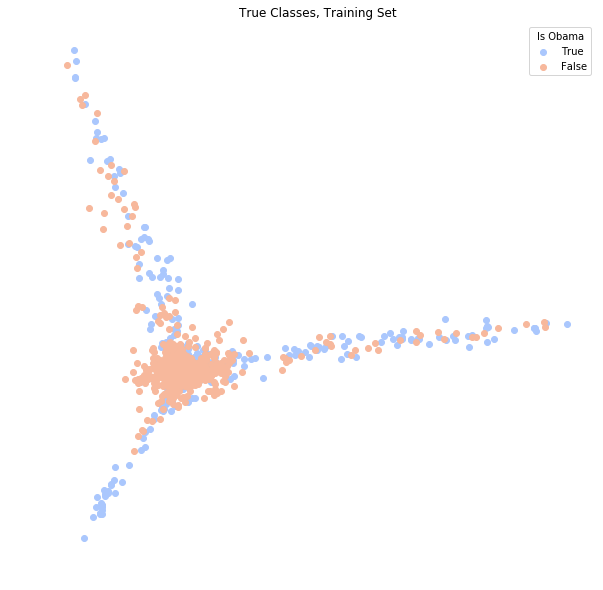

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

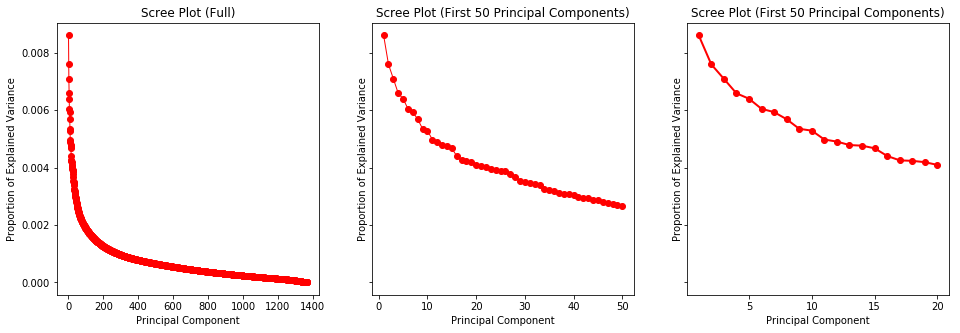

In [12]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [13]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [14]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [19]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6659356725146199

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [20]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6334310850439883

Slightly poorer. How about using more dimensions (40)?

In [21]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7331871345029239
Testing:
0.7067448680351907


Or still more (100)?

In [22]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8260233918128655
Testing:
0.7595307917888563


Or even more (200)!

In [23]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.868421052631579
Testing:
0.8035190615835777


This is becoming ridiculous (400)!

In [24]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9159356725146199
Testing:
0.841642228739003


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [27]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9597953216374269


Train the model using training data, and then test it on the testing data.

In [28]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8504398826979472


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [29]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [30]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9576023391812866
Testing:
0.8563049853372434


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [31]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [32]:
sklearn.metrics.precision_score(test_data_df['category'],test_data_df['nb_predict'])

0.8692307692307693

Recall:

In [33]:
sklearn.metrics.recall_score(test_data_df['category'],test_data_df['nb_predict'])

0.7793103448275862

F1-measure:

In [34]:
sklearn.metrics.f1_score(test_data_df['category'],test_data_df['nb_predict'])

0.8218181818181818

Let's take a look at how well our posterior distribution looks relative to the truth.

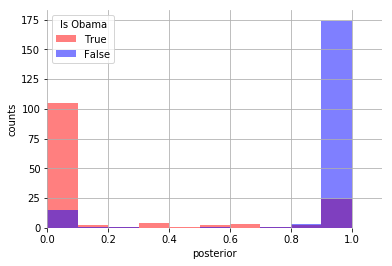

In [35]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [37]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pd.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,island,-2.273243,dick,-1.784717
1,fy,-2.297635,amy,-1.795299
2,announcement,-2.310057,monday,-1.849958
3,ground,-2.335375,brundage,-1.872686
4,welcomed,-2.361350,chicago,-2.007861
5,read,-2.401624,reform,-2.195459
6,welcome,-2.429404,oversight,-2.261057
7,class,-2.457977,temporary,-2.261057
8,environment,-2.457977,political,-2.278151
9,opportunities,-2.457977,location,-2.295543


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [18]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [19]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pd.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pd.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [20]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [21]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [22]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [23]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [24]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [25]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8972721996517702


In [26]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
665,soc.religion.christian,soc.religion.christian
798,soc.religion.christian,soc.religion.christian
330,talk.religion.misc,soc.religion.christian
1733,comp.graphics,comp.graphics
846,soc.religion.christian,soc.religion.christian
891,soc.religion.christian,soc.religion.christian
109,talk.religion.misc,talk.religion.misc
1598,comp.graphics,comp.graphics
1178,sci.space,sci.space
2083,comp.graphics,comp.graphics


Looks pretty good, lets examine the testing dataset:

In [27]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.8093023255813954


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

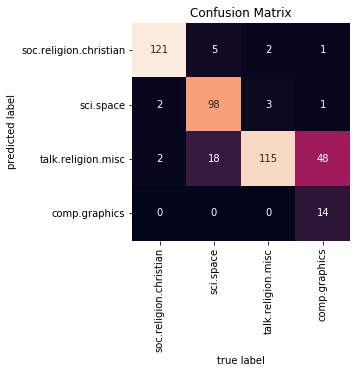

In [28]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [29]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #F-1 measure

0.862039834535601
0.8093023255813954
0.7873544198108624


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [30]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.graphics,0.027907,0.970885,0.937984,0.917271,0.968000
sci.space,0.067442,0.895250,0.942308,0.816680,0.809917
soc.religion.christian,0.169767,0.869489,0.628415,0.613859,0.958333
talk.religion.misc,0.116279,0.609375,1.000000,0.335029,0.218750


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

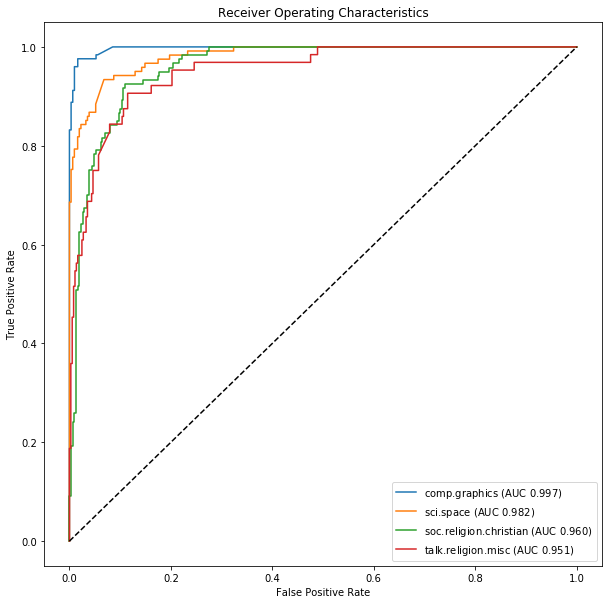

In [31]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

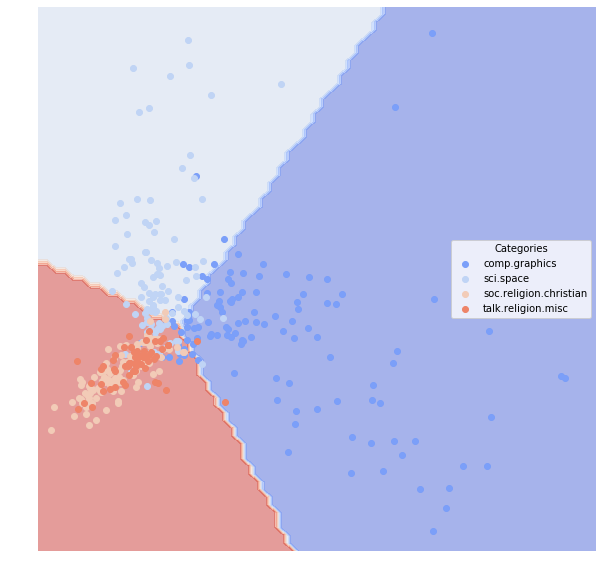

In [32]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


The dataset used here is part of a labeled online comment corpora. Every individual sentence with a label to imply whether this comment is considered to be toxic. In the dataset, for example, if a sentence is viewed as toxic, it would be labeled with "1.0" at the attribute "toxic", otherwise "0.0". After conversion, toxic comments would become positive (True) data points while normal comments would be regarded as negative (False) data points. 

In [33]:
# loading the dataset
my_coded_df = pd.read_csv("train_preprocessed.csv", usecols=['comment_text','toxic','set'], nrows=4000)
my_uncoded_df = pd.read_csv("test_preprocessed.csv", usecols=['comment_text','toxic','set'], nrows=500)
my_df = my_coded_df.append(my_uncoded_df,ignore_index=True)

my_df['tokenized_text'] = my_df['comment_text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
my_df['normalized_text'] = my_df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

# Text Vectorization
my_TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=2, max_df=100, stop_words='english', norm='l2',max_features=1000)
my_TFVects = my_TFVectorizer.fit_transform(my_df['comment_text'])
my_df['vect'] = [np.array(v).flatten() for v in my_TFVects.todense()]

# Dimension Reduction
my_pca = sklearn.decomposition.PCA()
my_df['PCA'] = [x for x in my_pca.fit_transform(np.stack(my_df['vect'], axis=0))]

In [34]:
# Training, Testing split
my_coded_df = my_df.loc[my_df['set']=='train']
my_uncoded_df = my_df.loc[my_df['set']=='test']
my_coded_df['category'] = [s == 1.0 for s in my_coded_df['toxic']]
my_train,my_test = lucem_illud_2020.trainTestSplit(my_coded_df, holdBackFraction=0.2)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


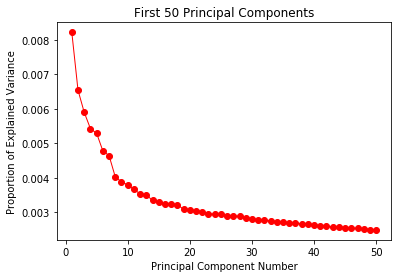

In [35]:
# Dimension Reduction
plt.plot(np.arange(50) + 1, my_pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
plt.title('First 50 Principal Components')
plt.xlabel('Principal Component Number')
plt.ylabel('Proportion of Explained Variance')
plt.show()

From this plot, we see that the increase in the number of principle components become less effective at around 8-10. Therefore, we would test logistic regressions with 8, 10 or 20 principle components and also the L1 regularized logistic regression.  

### Logistic Regression

In [36]:
my_train['PCA_10'] = [x[:10] for x in my_train['PCA']]
my_logistic_10 = sklearn.linear_model.LogisticRegression()
my_logistic_10.fit(np.stack(my_train['PCA_10'], axis=0), my_train['category'])

# training set score
print("PCA_10 training score: {}".format(my_logistic_10.score(np.stack(my_train['PCA_10'], axis=0), my_train['category'])))

# testing set score
my_test['PCA_10'] = [x[:10] for x in my_test['PCA']]
print("PCA_10 testing score: {}".format(my_logistic_10.score(np.stack(my_test['PCA_10'], axis=0), my_test['category'])))

PCA_10 training score: 0.92
PCA_10 testing score: 0.9175


In [37]:
# try another number of principle components
my_train['PCA_8'] = [x[:8] for x in my_train['PCA']]
my_logistic_8 = sklearn.linear_model.LogisticRegression()
my_logistic_8.fit(np.stack(my_train['PCA_8'], axis=0), my_train['category'])
my_test['PCA_8'] = [x[:8] for x in my_test['PCA']]
print("PCA_8 training score: {}".format(my_logistic_8.score(np.stack(my_train['PCA_8'], axis=0), my_train['category'])))
print("PCA_8 testing score: {}".format(my_logistic_8.score(np.stack(my_test['PCA_8'], axis=0), my_test['category'])))

PCA_8 training score: 0.919375
PCA_8 testing score: 0.9175


In [38]:
# try another number of principle components
my_train['PCA_20'] = [x[:20] for x in my_train['PCA']]
my_logistic_20 = sklearn.linear_model.LogisticRegression()
my_logistic_20.fit(np.stack(my_train['PCA_20'], axis=0), my_train['category'])
my_test['PCA_20'] = [x[:20] for x in my_test['PCA']]
print("PCA_20 training score: {}".format(my_logistic_20.score(np.stack(my_train['PCA_20'], axis=0), my_train['category'])))
print("PCA_20 testing score: {}".format(my_logistic_20.score(np.stack(my_test['PCA_20'], axis=0), my_test['category'])))
# already overfitting 

PCA_20 training score: 0.9234375
PCA_20 testing score: 0.91875


In [39]:
# try the L1 Logistic Regression
my_logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
my_logistic_l1.fit(np.stack(my_train['vect'], axis=0), my_train['category'])
print("L1 training score: {}".format(my_logistic_l1.score(np.stack(my_train['vect'], axis=0), my_train['category'])))
print("L1 testing score: {}".format(my_logistic_l1.score(np.stack(my_test['vect'], axis=0), my_test['category'])))

L1 training score: 0.92875
L1 testing score: 0.92125


In [40]:
# print precision, recall, F1, AUC
my_test['lr_predict']= my_logistic_l1.predict(np.stack(my_test['vect'], axis=0))
print("LR precision: {}".format(sklearn.metrics.precision_score(my_test['category'], my_test['lr_predict'])))
print("LR recall: {}".format(sklearn.metrics.recall_score(my_test['category'], my_test['lr_predict'])))
print("LR F1-score: {}".format(sklearn.metrics.f1_score(my_test['category'], my_test['lr_predict'])))
print("LR AUC: {}".format(sklearn.metrics.roc_auc_score(my_test['category'], my_test['lr_predict'])))

LR precision: 0.8928571428571429
LR recall: 0.29411764705882354
LR F1-score: 0.4424778761061947
LR AUC: 0.6449609214315097


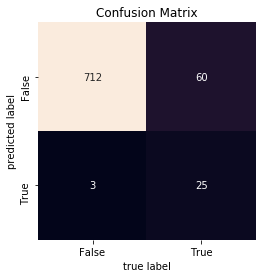

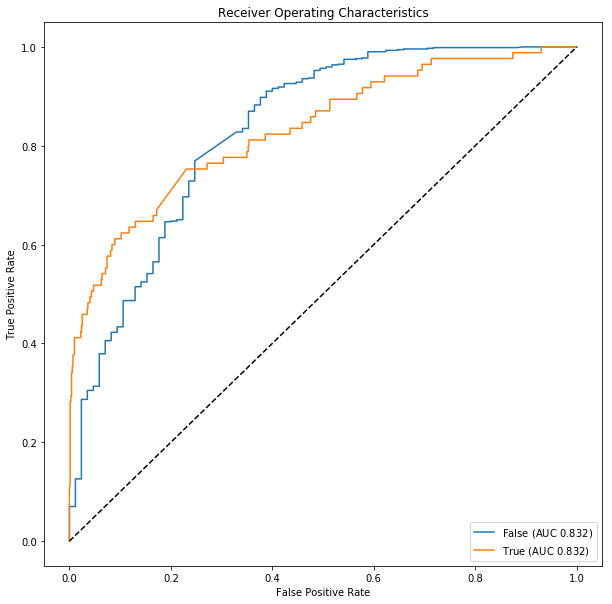

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


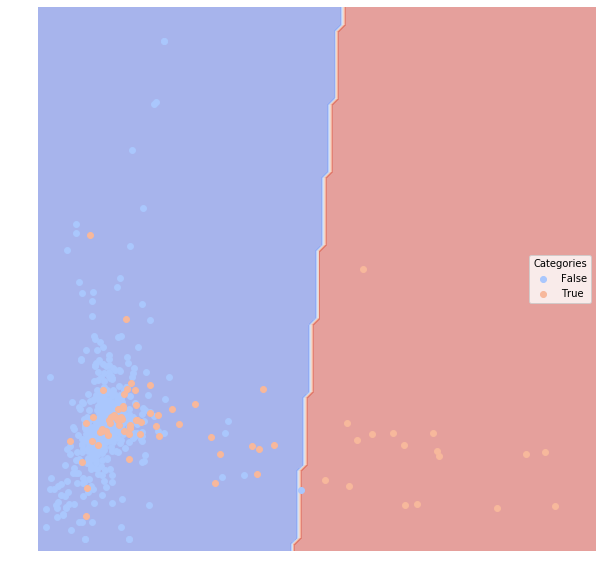

In [41]:
# visualize confusion matrix and ROC
lucem_illud_2020.plotConfusionMatrix(my_logistic_l1, my_test)
lucem_illud_2020.plotMultiROC(my_logistic_l1, my_test)
lucem_illud_2020.plotregions(my_logistic_l1, my_test)

From these scores, we can see that the Logistic Regression classifier could identify the negative class more clearly (precision = 0.8, negative items are seldom misclassified), but can hardly capture the positive class. In my dataset, a big issue is that the size of the two classes vary a lot. The positive class is only about 1/10 in the training set, and the logistic classifier is ineligible to capture the properties of this small class, since the recall and F1 scores are relatively low.

### Naive Bayes

In [42]:
my_naiveBayes = sklearn.naive_bayes.BernoulliNB()
my_naiveBayes.fit(np.stack(my_train['vect'], axis=0), my_train['category'])
print("Naive Bayes training score: {}".format(my_naiveBayes.score(np.stack(my_train['vect'], axis=0), my_train['category'])))
print("Naive Bayes testing score: {}".format(my_naiveBayes.score(np.stack(my_test['vect'], axis=0), my_test['category'])))

Naive Bayes training score: 0.9396875
Naive Bayes testing score: 0.91875


In [43]:
# print precision, recall, F1, AUC
my_test['nb_predict']= my_naiveBayes.predict(np.stack(my_test['vect'], axis=0))
print("NB precision: {}".format(sklearn.metrics.precision_score(my_test['category'], my_test['nb_predict'])))
print("NB recall: {}".format(sklearn.metrics.recall_score(my_test['category'], my_test['nb_predict'])))
print("NB F1-score: {}".format(sklearn.metrics.f1_score(my_test['category'], my_test['nb_predict'])))
print("NB AUC: {}".format(sklearn.metrics.roc_auc_score(my_test['category'], my_test['nb_predict'])))

NB precision: 0.6612903225806451
NB recall: 0.4823529411764706
NB F1-score: 0.5578231292517007
NB AUC: 0.7264911559029206


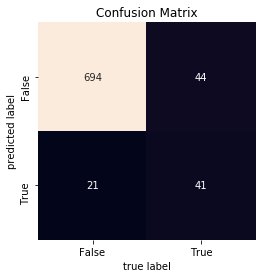

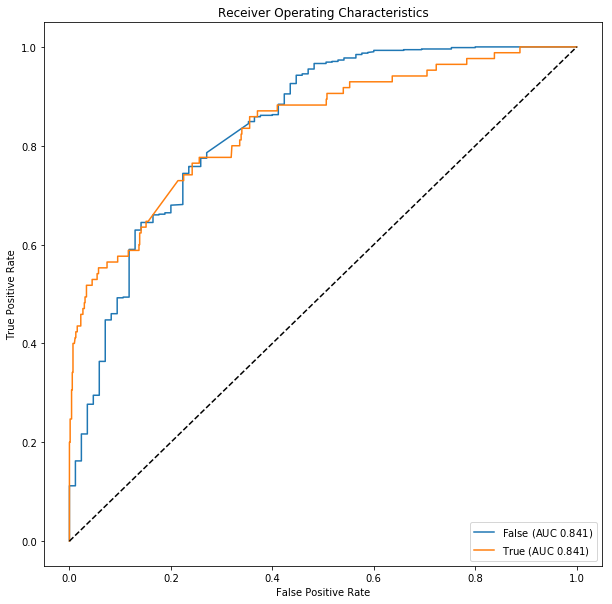

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


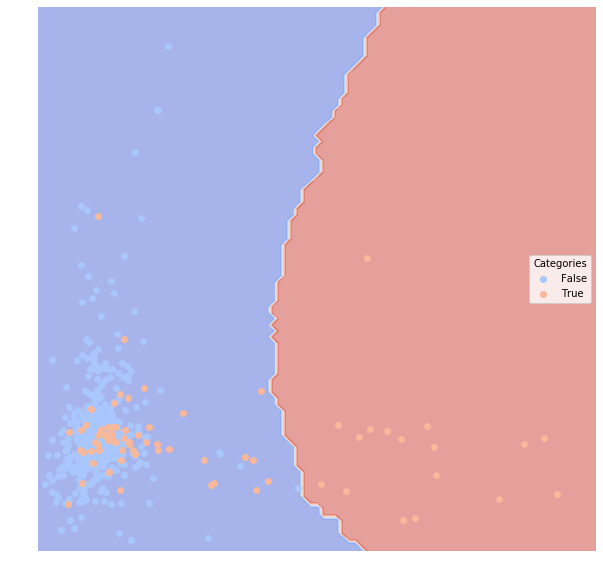

In [46]:
# visualize confusion matrix and ROC
lucem_illud_2020.plotConfusionMatrix(my_naiveBayes, my_test)
lucem_illud_2020.plotMultiROC(my_naiveBayes, my_test)
lucem_illud_2020.plotregions(my_naiveBayes, my_test)

Although the naive Bayesian classifier is inferior to the logistic regression classifier in terms of precision score, it shows stronger performances in other indexes. This suggests that the classifier can better identify data in the positive class, but also it is likely to over-identify negative items into the positive.

### Extrapolation

In [47]:
my_uncoded_df['nb_predict']= my_naiveBayes.predict(np.stack(my_uncoded_df['vect'], axis=0))
my_uncoded_df

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment_text,set,toxic,tokenized_text,normalized_text,vect,PCA,nb_predict
4000,yo bitch ja rule is more succesful then you ll...,test,NaN,"[yo, bitch, ja, rule, is, more, succesful, the...","[yo, bitch, ja, rule, succesful, will, s, hate...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01889582122272713, -0.011816377045716196, ...",True
4001,from rfc the title is fine as it is imo,test,NaN,"[from, rfc, the, title, is, fine, as, it, is, ...","[rfc, title, fine, imo]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00476329901758537, -0.011198180321319738, 0...",False
4002,sources zawe ashton on lapland,test,NaN,"[sources, zawe, ashton, on, lapland]","[source, zawe, ashton, lapland]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False
4003,if you have a look back at the source the in...,test,NaN,"[if, you, have, a, look, back, at, the, source...","[look, source, information, update, correct, f...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.007567030913521552, -0.012517477749979454,...",False
4004,i don t anonymously edit articles at all,test,NaN,"[i, don, t, anonymously, edit, articles, at, all]","[don, t, anonymously, edit, article]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False
4005,thank you for understanding i think very high...,test,NaN,"[thank, you, for, understanding, i, think, ver...","[thank, understanding, think, highly, revert, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0045402407670705695, -0.004559648308938884...",False
4006,please do not add nonsense to wikipedia such ...,test,NaN,"[please, do, not, add, nonsense, to, wikipedia...","[add, nonsense, wikipedia, edit, consider, van...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01329529483469381, -0.014756573238811476, ...",False
4007,dear god this site is horrible,test,NaN,"[dear, god, this, site, is, horrible]","[dear, god, site, horrible]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.009972829647171295, -0.00611105067106563, ...",False
4008,only a fool can believe in such numbers the ...,test,NaN,"[only, a, fool, can, believe, in, such, number...","[fool, believe, number, correct, number, lie, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015299264963101855, -0.02199965687627913, ...",False
4009,double redirects when fixing double redirects...,test,NaN,"[double, redirects, when, fixing, double, redi...","[double, redirect, fix, double, redirect, don,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.003775783273464989, 0.002250726647024794, ...",False


In [48]:
my_uncoded_df['lr_predict']= my_logistic_l1.predict(np.stack(my_uncoded_df['vect'], axis=0))
my_uncoded_df

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment_text,set,toxic,tokenized_text,normalized_text,vect,PCA,nb_predict,lr_predict
4000,yo bitch ja rule is more succesful then you ll...,test,NaN,"[yo, bitch, ja, rule, is, more, succesful, the...","[yo, bitch, ja, rule, succesful, will, s, hate...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01889582122272713, -0.011816377045716196, ...",True,True
4001,from rfc the title is fine as it is imo,test,NaN,"[from, rfc, the, title, is, fine, as, it, is, ...","[rfc, title, fine, imo]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00476329901758537, -0.011198180321319738, 0...",False,False
4002,sources zawe ashton on lapland,test,NaN,"[sources, zawe, ashton, on, lapland]","[source, zawe, ashton, lapland]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False
4003,if you have a look back at the source the in...,test,NaN,"[if, you, have, a, look, back, at, the, source...","[look, source, information, update, correct, f...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.007567030913521552, -0.012517477749979454,...",False,False
4004,i don t anonymously edit articles at all,test,NaN,"[i, don, t, anonymously, edit, articles, at, all]","[don, t, anonymously, edit, article]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False
4005,thank you for understanding i think very high...,test,NaN,"[thank, you, for, understanding, i, think, ver...","[thank, understanding, think, highly, revert, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0045402407670705695, -0.004559648308938884...",False,False
4006,please do not add nonsense to wikipedia such ...,test,NaN,"[please, do, not, add, nonsense, to, wikipedia...","[add, nonsense, wikipedia, edit, consider, van...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01329529483469381, -0.014756573238811476, ...",False,False
4007,dear god this site is horrible,test,NaN,"[dear, god, this, site, is, horrible]","[dear, god, site, horrible]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.009972829647171295, -0.00611105067106563, ...",False,False
4008,only a fool can believe in such numbers the ...,test,NaN,"[only, a, fool, can, believe, in, such, number...","[fool, believe, number, correct, number, lie, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015299264963101855, -0.02199965687627913, ...",False,False
4009,double redirects when fixing double redirects...,test,NaN,"[double, redirects, when, fixing, double, redi...","[double, redirect, fix, double, redirect, don,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.003775783273464989, 0.002250726647024794, ...",False,False


# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

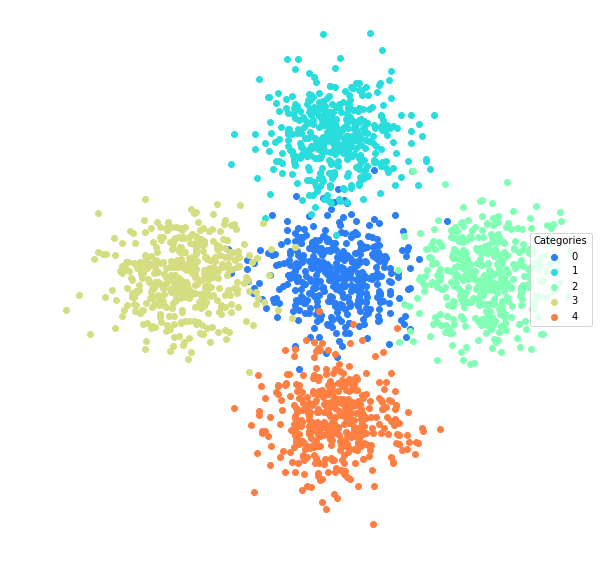

In [49]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [50]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

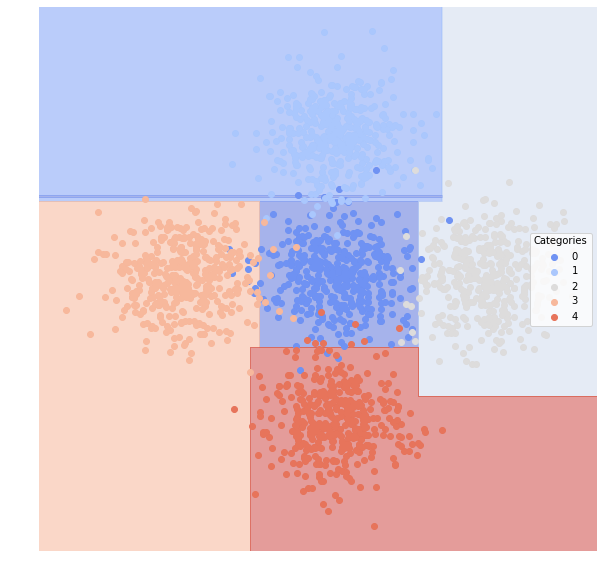

In [51]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [52]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.018,0.974285,0.951923,0.922955,0.961165
1,0.006,0.992410,0.979798,0.971800,0.989796
2,0.006,0.988846,0.990000,0.974396,0.980198
3,0.006,0.996250,0.970874,0.970874,1.000000
4,0.008,0.979592,1.000000,0.967184,0.959184


Lets look at accuracy:

In [53]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.978

What happens if we trim the tree?

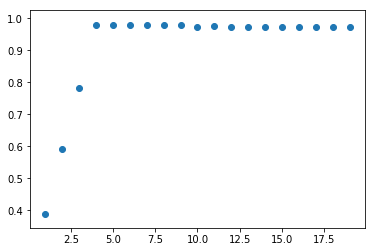

In [54]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [55]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [56]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

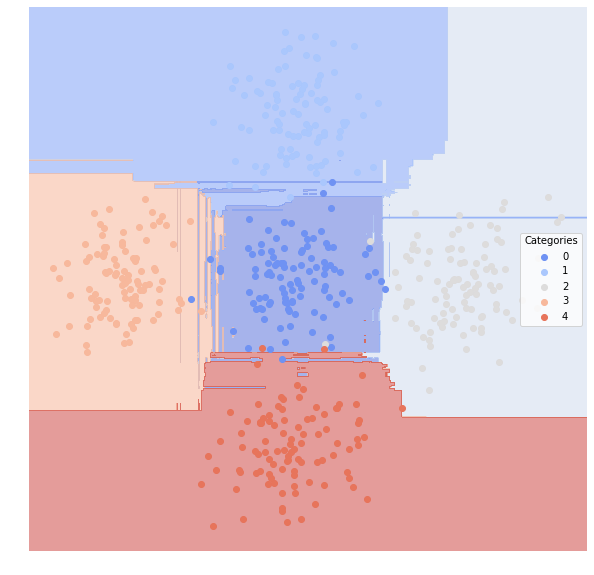

In [57]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [58]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.022,0.964577,0.950980,0.907583,0.941748
1,0.004,0.993654,0.989796,0.981696,0.989796
2,0.008,0.987593,0.980198,0.964788,0.980198
3,0.006,0.996250,0.970874,0.970874,1.000000
4,0.008,0.983450,0.989583,0.965290,0.969388


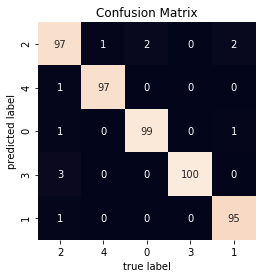

In [59]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

### Decision Trees

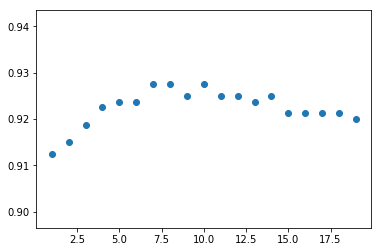

In [60]:
# decide the tree layer
my_tree_depths = []
my_tree_scores = []
for i in range(1,20):
    temp_tree = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    temp_tree.fit(np.stack(my_train['vect'], axis =0), my_train['category'])
    score = sklearn.metrics.accuracy_score(my_test['category'], temp_tree.predict(np.stack(my_test['vect'], axis = 0)))
    my_tree_depths.append(i)
    my_tree_scores.append(score)
plt.scatter(my_tree_depths,my_tree_scores)
plt.show()

In [61]:
# using 4 as the depth parameter
my_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
my_tree.fit(np.stack(my_train['vect'], axis=0), my_train['category'])
print("Decision tree training score: {}".format(my_tree.score(np.stack(my_train['vect'], axis=0), my_train['category'])))
print("Decision tree testing score: {}".format(my_tree.score(np.stack(my_test['vect'], axis=0), my_test['category'])))

Decision tree training score: 0.9278125
Decision tree testing score: 0.9225


In [62]:
# print precision, recall, F1, AUC
my_test['tree_predict']= my_tree.predict(np.stack(my_test['vect'], axis=0))
print("Tree precision: {}".format(sklearn.metrics.precision_score(my_test['category'], my_test['tree_predict'])))
print("Tree recall: {}".format(sklearn.metrics.recall_score(my_test['category'], my_test['tree_predict'])))
print("Tree F1-score: {}".format(sklearn.metrics.f1_score(my_test['category'], my_test['tree_predict'])))
print("Tree AUC: {}".format(sklearn.metrics.roc_auc_score(my_test['category'], my_test['tree_predict'])))

Tree precision: 0.896551724137931
Tree recall: 0.3058823529411765
Tree F1-score: 0.45614035087719307
Tree AUC: 0.6508432743726861


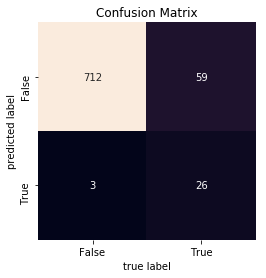

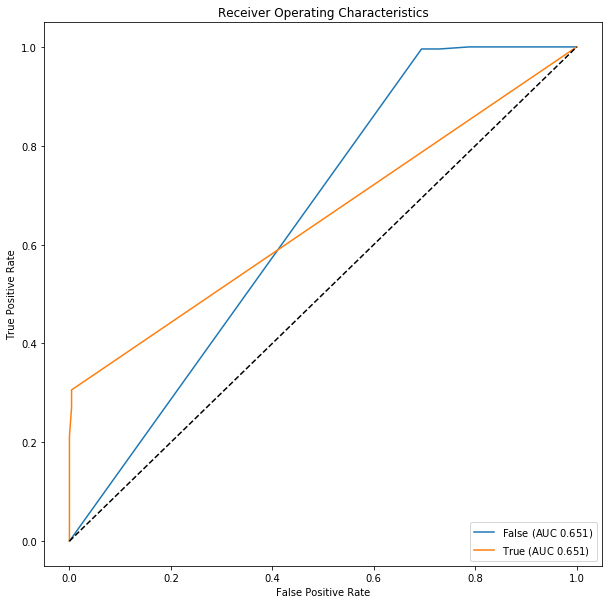

In [63]:
# visualize confusion matrix and ROC
lucem_illud_2020.plotConfusionMatrix(my_tree, my_test)
lucem_illud_2020.plotMultiROC(my_tree, my_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


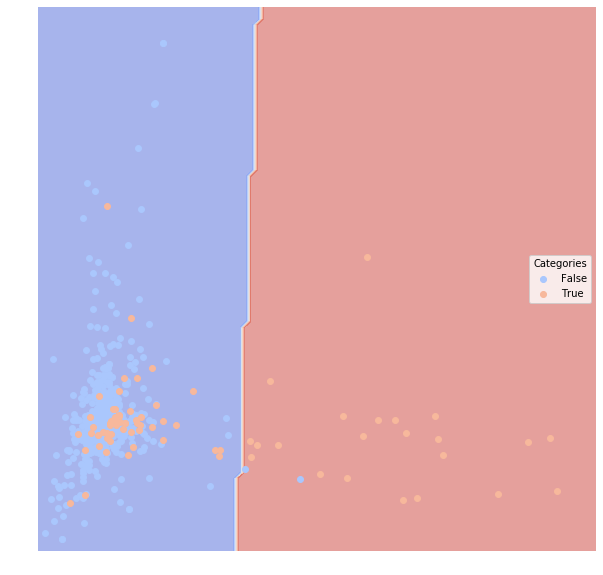

In [66]:
lucem_illud_2020.plotregions(my_tree, my_test)

The Decision Tree classifier suggests us that over four layers, it is likely to overfit the data, so we use the 4 layer tree for the following classification. The four-layer decision tree model functions similarly as the logistic regression model. It can also pick out the members of the negative (False) class almost precisely while does better in identifying the positive (True) class items. 

### Random Forest

In [67]:
my_rf = sklearn.ensemble.BaggingClassifier(sklearn.tree.DecisionTreeClassifier(max_depth=10), 
                                           n_estimators=100, max_samples=0.8, random_state=1)
my_rf.fit(np.stack(my_train['vect'], axis =0), my_train['category'])
print("Random Forest training score: {}".format(my_rf.score(np.stack(my_train['vect'], axis=0), my_train['category'])))
print("Random Forest testing score: {}".format(my_rf.score(np.stack(my_test['vect'], axis=0), my_test['category'])))

Random Forest training score: 0.945
Random Forest testing score: 0.92375


In [68]:
# print precision, recall, F1, AUC
my_test['rf_predict']= my_rf.predict(np.stack(my_test['vect'], axis=0))
print("Random Forest precision: {}".format(sklearn.metrics.precision_score(my_test['category'], my_test['rf_predict'])))
print("Random Forest recall: {}".format(sklearn.metrics.recall_score(my_test['category'], my_test['rf_predict'])))
print("Random Forest F1-score: {}".format(sklearn.metrics.f1_score(my_test['category'], my_test['rf_predict'])))
print("Random Forest AUC: {}".format(sklearn.metrics.roc_auc_score(my_test['category'], my_test['rf_predict'])))

Random Forest precision: 0.8
Random Forest recall: 0.3764705882352941
Random Forest F1-score: 0.512
Random Forest AUC: 0.6826408885232415


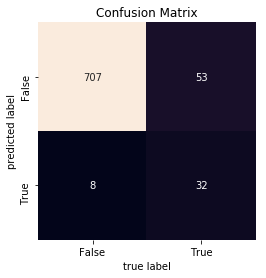

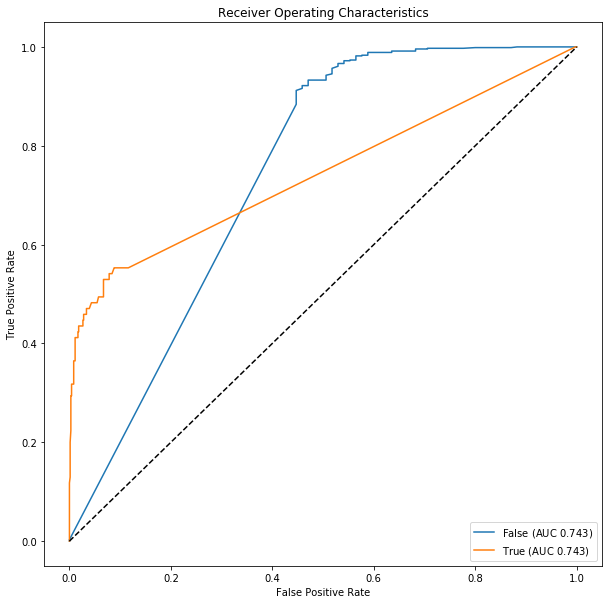

In [69]:
# visualize confusion matrix and ROC
lucem_illud_2020.plotConfusionMatrix(my_rf, my_test)
lucem_illud_2020.plotMultiROC(my_rf, my_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


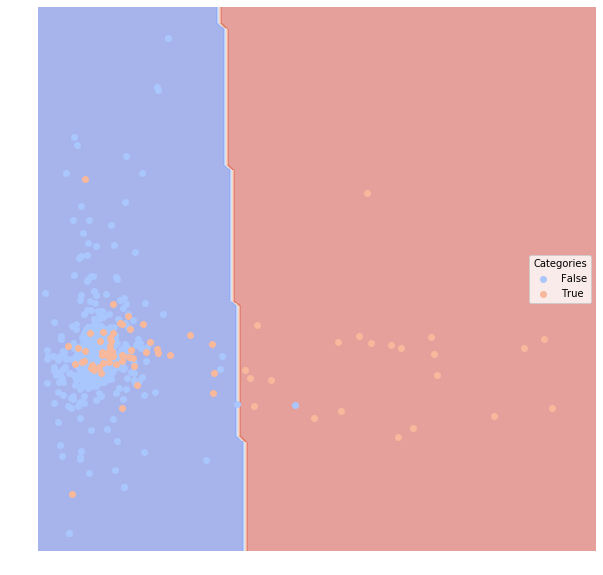

In [70]:
lucem_illud_2020.plotregions(my_rf, my_test)

Using this random forest model, we can see a rise in the recall and AUC scores compared to the single decision tree model. This suggests that the ensemble model develops an advantage in identifying positive data points after bagging those single decision tree models. 

### Extrapolation

In [71]:
my_uncoded_df['tree_predict']= my_tree.predict(np.stack(my_uncoded_df['vect'], axis=0))
my_uncoded_df['rf_predict']= my_rf.predict(np.stack(my_uncoded_df['vect'], axis=0))
my_uncoded_df

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,comment_text,set,toxic,tokenized_text,normalized_text,vect,PCA,nb_predict,lr_predict,tree_predict,rf_predict
4000,yo bitch ja rule is more succesful then you ll...,test,NaN,"[yo, bitch, ja, rule, is, more, succesful, the...","[yo, bitch, ja, rule, succesful, will, s, hate...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01889582122272713, -0.011816377045716196, ...",True,True,False,True
4001,from rfc the title is fine as it is imo,test,NaN,"[from, rfc, the, title, is, fine, as, it, is, ...","[rfc, title, fine, imo]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00476329901758537, -0.011198180321319738, 0...",False,False,False,False
4002,sources zawe ashton on lapland,test,NaN,"[sources, zawe, ashton, on, lapland]","[source, zawe, ashton, lapland]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False,False,False
4003,if you have a look back at the source the in...,test,NaN,"[if, you, have, a, look, back, at, the, source...","[look, source, information, update, correct, f...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.007567030913521552, -0.012517477749979454,...",False,False,False,False
4004,i don t anonymously edit articles at all,test,NaN,"[i, don, t, anonymously, edit, articles, at, all]","[don, t, anonymously, edit, article]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False,False,False
4005,thank you for understanding i think very high...,test,NaN,"[thank, you, for, understanding, i, think, ver...","[thank, understanding, think, highly, revert, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0045402407670705695, -0.004559648308938884...",False,False,False,False
4006,please do not add nonsense to wikipedia such ...,test,NaN,"[please, do, not, add, nonsense, to, wikipedia...","[add, nonsense, wikipedia, edit, consider, van...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01329529483469381, -0.014756573238811476, ...",False,False,False,False
4007,dear god this site is horrible,test,NaN,"[dear, god, this, site, is, horrible]","[dear, god, site, horrible]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.009972829647171295, -0.00611105067106563, ...",False,False,False,False
4008,only a fool can believe in such numbers the ...,test,NaN,"[only, a, fool, can, believe, in, such, number...","[fool, believe, number, correct, number, lie, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015299264963101855, -0.02199965687627913, ...",False,False,False,False
4009,double redirects when fixing double redirects...,test,NaN,"[double, redirects, when, fixing, double, redi...","[double, redirect, fix, double, redirect, don,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.003775783273464989, 0.002250726647024794, ...",False,False,False,False


# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [72]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, better..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[m, sorry, read, commandment]"


Make a testing and training set:

In [73]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [74]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [75]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [76]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [77]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
comp.graphics,0.282647,0.606663,0.465753,0.340853,0.367965
sci.space,0.313987,0.622528,0.441459,0.356628,0.479167
soc.religion.christian,0.252467,0.536596,0.945946,0.322050,0.074786
talk.religion.misc,0.426582,0.585250,0.236250,0.214623,0.603834


And lets look at the testing data

In [78]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.2186046511627907


Let's produce another confusion matrix:

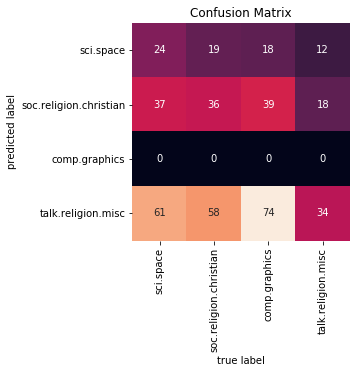

In [79]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

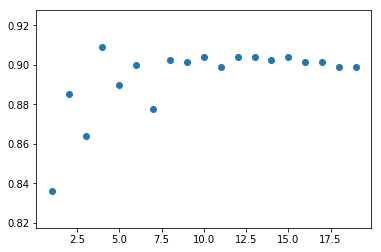

In [80]:
# decide the best k
my_ks = []
my_knn_scores = []
for i in range(1,20):
    temp_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    temp_knn.fit(np.stack(my_train['vect'], axis =0), my_train['category'])
    score = sklearn.metrics.accuracy_score(my_test['category'], temp_knn.predict(np.stack(my_test['vect'], axis = 0)))
    my_ks.append(i)
    my_knn_scores.append(score)
plt.scatter(my_ks, my_knn_scores)
plt.show()

In [81]:
my_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
my_knn.fit(np.stack(my_train['vect'], axis =0), my_train['category'])
print("KNN(k=4) training score: {}".format(my_knn.score(np.stack(my_train['vect'], axis=0), my_train['category'])))
print("KNN(k=4) testing score: {}".format(my_knn.score(np.stack(my_test['vect'], axis=0), my_test['category'])))

KNN(k=4) training score: 0.9275
KNN(k=4) testing score: 0.90875


In [83]:
# print precision, recall, F1, AUC
my_test['knn_predict']= my_knn.predict(np.stack(my_test['vect'], axis=0))
print("KNN(k=4) precision: {}".format(sklearn.metrics.precision_score(my_test['category'], my_test['knn_predict'])))
print("KNN(k=4) recall: {}".format(sklearn.metrics.recall_score(my_test['category'], my_test['knn_predict'])))
print("KNN(k=4) F1-score: {}".format(sklearn.metrics.f1_score(my_test['category'], my_test['knn_predict'])))
print("KNN(k=4) AUC: {}".format(sklearn.metrics.roc_auc_score(my_test['category'], my_test['knn_predict'])))

KNN(k=4) precision: 0.7727272727272727
KNN(k=4) recall: 0.2
KNN(k=4) F1-score: 0.31775700934579443
KNN(k=4) AUC: 0.5965034965034964


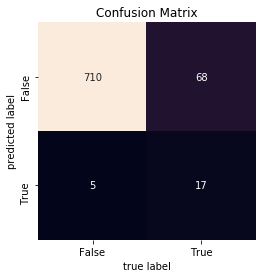

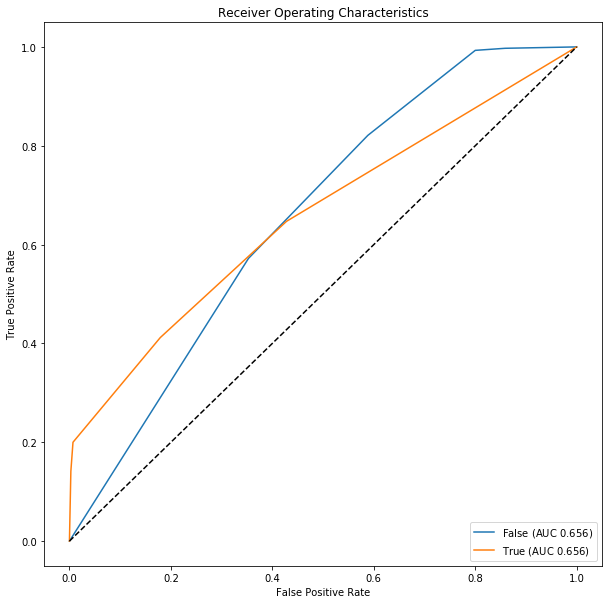

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


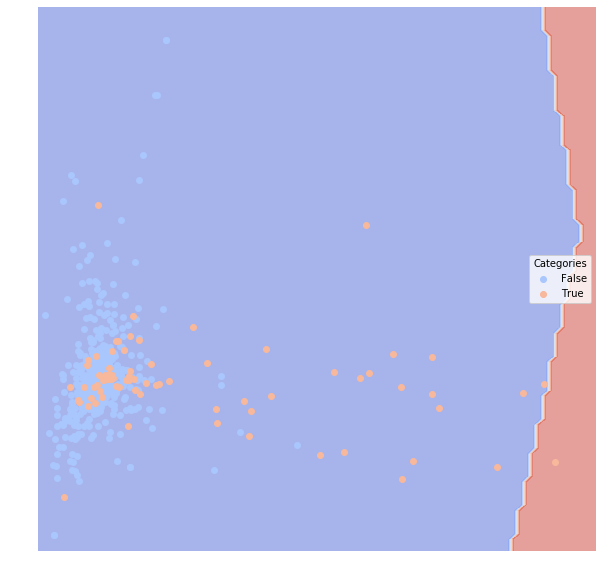

In [82]:
# visualize confusion matrix, ROC and classified region
lucem_illud_2020.plotConfusionMatrix(my_knn, my_test)
lucem_illud_2020.plotMultiROC(my_knn, my_test)
lucem_illud_2020.plotregions(my_knn, my_test)

We firstly obtained a desirable value k for the knn classifer, to avoid both overfitting and high model bias. The knn (k=4) classifier shows a higher bias in classification of my dataset than other classifiers. It is capable of classifying the negative data points but is also the worst to identify the positive ones. So if we use this knn model, a number of toxic comments are likely to be misclassified as ordinary comments.   

### Extrapolation

In [84]:
my_uncoded_df['knn_predict']= my_knn.predict(np.stack(my_uncoded_df['vect'], axis=0))
my_uncoded_df

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment_text,set,toxic,tokenized_text,normalized_text,vect,PCA,nb_predict,lr_predict,tree_predict,rf_predict,knn_predict
4000,yo bitch ja rule is more succesful then you ll...,test,NaN,"[yo, bitch, ja, rule, is, more, succesful, the...","[yo, bitch, ja, rule, succesful, will, s, hate...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01889582122272713, -0.011816377045716196, ...",True,True,False,True,False
4001,from rfc the title is fine as it is imo,test,NaN,"[from, rfc, the, title, is, fine, as, it, is, ...","[rfc, title, fine, imo]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00476329901758537, -0.011198180321319738, 0...",False,False,False,False,False
4002,sources zawe ashton on lapland,test,NaN,"[sources, zawe, ashton, on, lapland]","[source, zawe, ashton, lapland]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False,False,False,False
4003,if you have a look back at the source the in...,test,NaN,"[if, you, have, a, look, back, at, the, source...","[look, source, information, update, correct, f...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.007567030913521552, -0.012517477749979454,...",False,False,False,False,False
4004,i don t anonymously edit articles at all,test,NaN,"[i, don, t, anonymously, edit, articles, at, all]","[don, t, anonymously, edit, article]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False,False,False,False
4005,thank you for understanding i think very high...,test,NaN,"[thank, you, for, understanding, i, think, ver...","[thank, understanding, think, highly, revert, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0045402407670705695, -0.004559648308938884...",False,False,False,False,False
4006,please do not add nonsense to wikipedia such ...,test,NaN,"[please, do, not, add, nonsense, to, wikipedia...","[add, nonsense, wikipedia, edit, consider, van...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01329529483469381, -0.014756573238811476, ...",False,False,False,False,False
4007,dear god this site is horrible,test,NaN,"[dear, god, this, site, is, horrible]","[dear, god, site, horrible]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.009972829647171295, -0.00611105067106563, ...",False,False,False,False,False
4008,only a fool can believe in such numbers the ...,test,NaN,"[only, a, fool, can, believe, in, such, number...","[fool, believe, number, correct, number, lie, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015299264963101855, -0.02199965687627913, ...",False,False,False,False,False
4009,double redirects when fixing double redirects...,test,NaN,"[double, redirects, when, fixing, double, redi...","[double, redirect, fix, double, redirect, don,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.003775783273464989, 0.002250726647024794, ...",False,False,False,False,False


# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [85]:
redditDf = pd.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [86]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [87]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [88]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [89]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.018809,0.979251,0.951807,0.934575,0.975309
Bad Roommates: Tales of Irritation,0.018809,0.966604,0.969697,0.925195,0.941176
Relationships,0.028213,0.966236,0.943182,0.912356,0.954023
Weeaboo Tales: stories about the extreme fans of japanese culture,0.003135,0.993976,1.000000,0.991087,0.987952


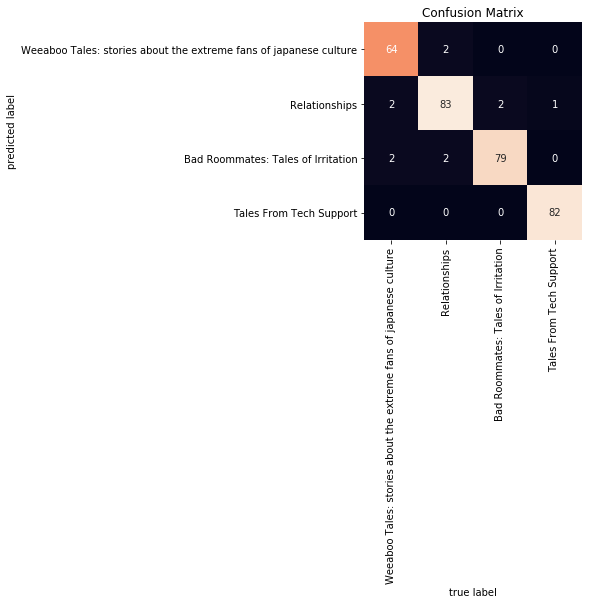

In [90]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

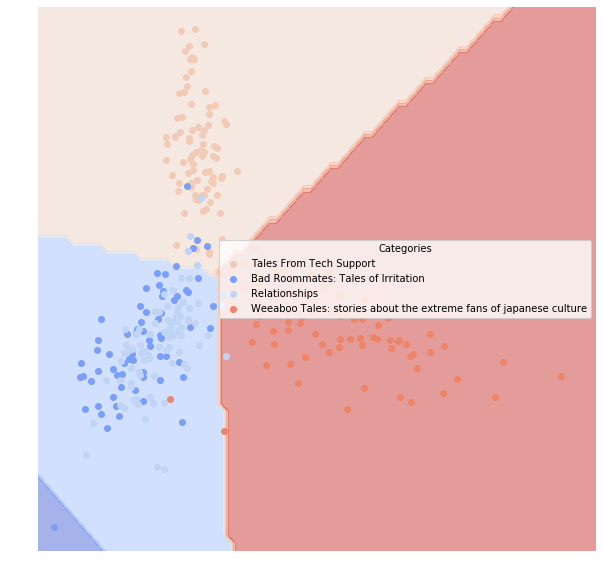

In [91]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [92]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.015674,0.981352,0.963415,0.945896,0.975309
Bad Roommates: Tales of Irritation,0.021944,0.964612,0.955224,0.911573,0.941176
Relationships,0.025078,0.968391,0.954023,0.922699,0.954023
Weeaboo Tales: stories about the extreme fans of japanese culture,0.006270,0.991857,0.987952,0.979184,0.987952


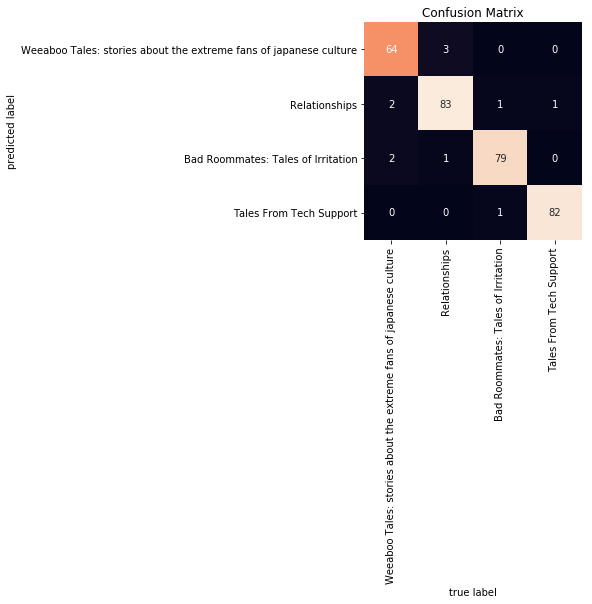

In [94]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

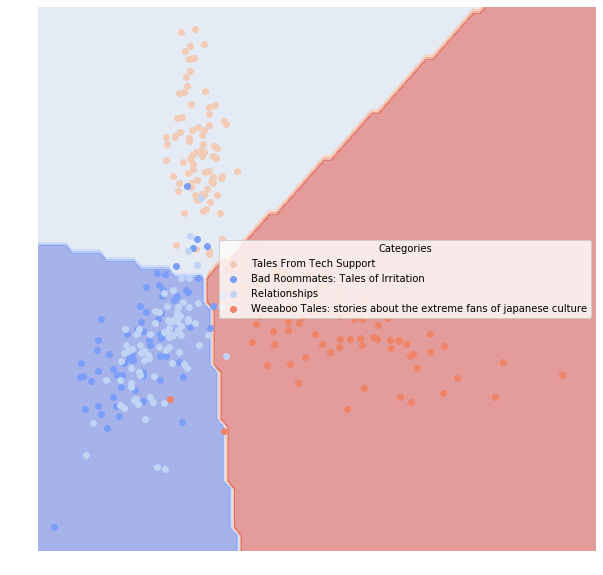

In [95]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [99]:
my_mlp = sklearn.neural_network.MLPClassifier()
my_mlp.fit(np.stack(my_train['vect'], axis=0), my_train['category'])
print("MLP training score: {}".format(my_mlp.score(np.stack(my_train['vect'], axis=0), my_train['category'])))
print("MLP testing score: {}".format(my_mlp.score(np.stack(my_test['vect'], axis=0), my_test['category'])))

MLP training score: 0.9859375
MLP testing score: 0.88875


In [100]:
lucem_illud_2020.evaluateClassifier(my_mlp, my_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.11125,0.683793,0.932320,0.930163,0.944056
True,0.11125,0.683793,0.473684,0.261869,0.423529


In [101]:
# print precision, recall, F1, AUC
my_test['mlp_predict']= my_mlp.predict(np.stack(my_test['vect'], axis=0))
print("MLP precision: {}".format(sklearn.metrics.precision_score(my_test['category'], my_test['mlp_predict'])))
print("MLP recall: {}".format(sklearn.metrics.recall_score(my_test['category'], my_test['mlp_predict'])))
print("MLP F1-score: {}".format(sklearn.metrics.f1_score(my_test['category'], my_test['mlp_predict'])))
print("MLP AUC: {}".format(sklearn.metrics.roc_auc_score(my_test['category'], my_test['mlp_predict'])))

MLP precision: 0.47368421052631576
MLP recall: 0.4235294117647059
MLP F1-score: 0.44720496894409933
MLP AUC: 0.683792677910325


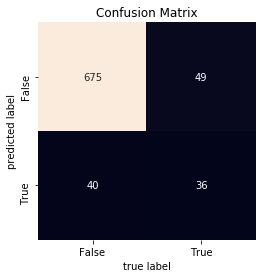

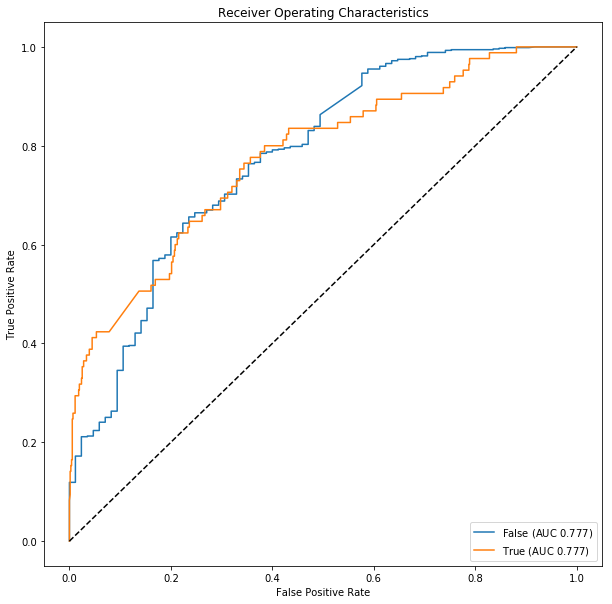

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


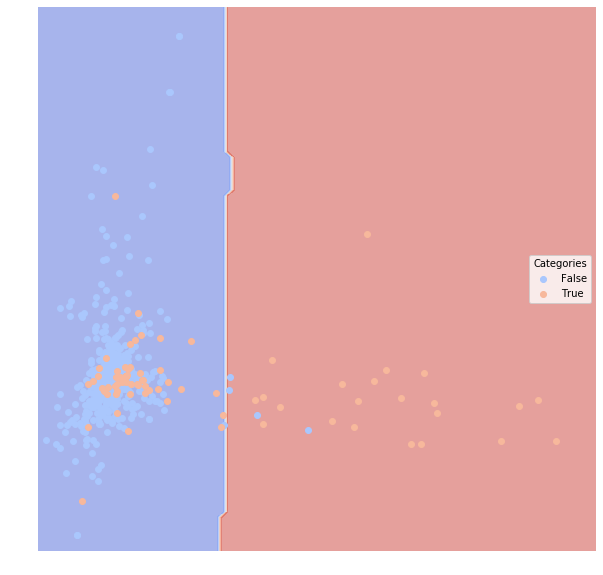

In [102]:
# visualize confusion matrix, ROC and classified region
lucem_illud_2020.plotConfusionMatrix(my_mlp, my_test)
lucem_illud_2020.plotMultiROC(my_mlp, my_test)
lucem_illud_2020.plotregions(my_mlp, my_test)

This classifier does better in identifying data points of the positive class than most other classifiers, but at the same time, it is more likely to misclassify the ordinary data points as a toxic one. I found that among all classifiers, there is such a paradox that the stronger the ability to identify true negative data points, the weaker the ability to identify positive data points. Not many classifiers that can make a good balance since most of them have the bias to be ineligible to catch some positive (True) data points. For my data set, the naive bayes classifier performs better than the others while still has the bias mentioned earlier. It is important to notice that in my dataset, the size of the positive data points (toxic sentences) are much smaller than positive ones, which might bring obstacles for classifiers to capture their features. Hence, an important approach might be increasing the use or weights of positive data points in the training process.

### Extrapolation

In [103]:
my_uncoded_df['mlp_predict']= my_mlp.predict(np.stack(my_uncoded_df['vect'], axis=0))
my_uncoded_df

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment_text,set,toxic,tokenized_text,normalized_text,vect,PCA,nb_predict,lr_predict,tree_predict,rf_predict,knn_predict,mlp_predict
4000,yo bitch ja rule is more succesful then you ll...,test,NaN,"[yo, bitch, ja, rule, is, more, succesful, the...","[yo, bitch, ja, rule, succesful, will, s, hate...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01889582122272713, -0.011816377045716196, ...",True,True,False,True,False,True
4001,from rfc the title is fine as it is imo,test,NaN,"[from, rfc, the, title, is, fine, as, it, is, ...","[rfc, title, fine, imo]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00476329901758537, -0.011198180321319738, 0...",False,False,False,False,False,False
4002,sources zawe ashton on lapland,test,NaN,"[sources, zawe, ashton, on, lapland]","[source, zawe, ashton, lapland]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False,False,False,False,False
4003,if you have a look back at the source the in...,test,NaN,"[if, you, have, a, look, back, at, the, source...","[look, source, information, update, correct, f...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.007567030913521552, -0.012517477749979454,...",False,False,False,False,False,False
4004,i don t anonymously edit articles at all,test,NaN,"[i, don, t, anonymously, edit, articles, at, all]","[don, t, anonymously, edit, article]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0006453732876010597, 0.0002782927383514487...",False,False,False,False,False,False
4005,thank you for understanding i think very high...,test,NaN,"[thank, you, for, understanding, i, think, ver...","[thank, understanding, think, highly, revert, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0045402407670705695, -0.004559648308938884...",False,False,False,False,False,False
4006,please do not add nonsense to wikipedia such ...,test,NaN,"[please, do, not, add, nonsense, to, wikipedia...","[add, nonsense, wikipedia, edit, consider, van...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01329529483469381, -0.014756573238811476, ...",False,False,False,False,False,False
4007,dear god this site is horrible,test,NaN,"[dear, god, this, site, is, horrible]","[dear, god, site, horrible]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.009972829647171295, -0.00611105067106563, ...",False,False,False,False,False,True
4008,only a fool can believe in such numbers the ...,test,NaN,"[only, a, fool, can, believe, in, such, number...","[fool, believe, number, correct, number, lie, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.015299264963101855, -0.02199965687627913, ...",False,False,False,False,False,False
4009,double redirects when fixing double redirects...,test,NaN,"[double, redirects, when, fixing, double, redi...","[double, redirect, fix, double, redirect, don,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.003775783273464989, 0.002250726647024794, ...",False,False,False,False,False,False
